In [1]:
from pygdsm import GlobalSkyModel2016
import healpy as hp
import numpy as np
from numpy.linalg import svd
from scipy.special import eval_legendre
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

import src.beam_functions as BF
import src.spherical_harmonics as SH
import src.forward_model as FM
import src.sky_models as SM
import src.map_making as MM
import src.plotting as PL
from src.blockmat import BlockMatrix, BlockVector
from anstey.generate import T_CMB

RS = SH.RealSphericalHarmonics()

In [2]:
nuarr = 60
lmax  = 8
nside = lmax
seed = 123
sigma = 0.0851
sigma_T = sigma * np.log(408/nuarr)

_, gsma_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, original_map=True)
gsma_map = gsma_map[0]
_, fg_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed, original_map=True)
# Generate a series of these
fg_maps = []
fg_alms = []
for i in range(500):
    alm, m = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed+i, original_map=True)
    fg_maps.append(m[0])
    fg_alms.append(alm)

successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successful

In [3]:
np.shape(fg_maps)

(500, 768)

In [4]:
np.shape(fg_alms)

(500, 81)

In [5]:
# Calculate the mean and covariance of the error instances.
fg_samplemean = np.mean(fg_maps, axis=0)
fg_samplestd = np.std(fg_maps, axis=0)

In [6]:
sigma_T

0.16313011429669338

In [7]:
(np.exp(2*sigma_T**2)-np.exp(sigma_T**2))

0.02769599002681633

In [8]:
# Compare this to the analytic mean and covariance of the error instance distribution.
fg_analmean = (gsma_map-T_CMB)*np.exp(sigma_T**2/2) + T_CMB
fg_analcov  = (gsma_map-T_CMB)**2 * (np.exp(2*sigma_T**2)-np.exp(sigma_T**2))

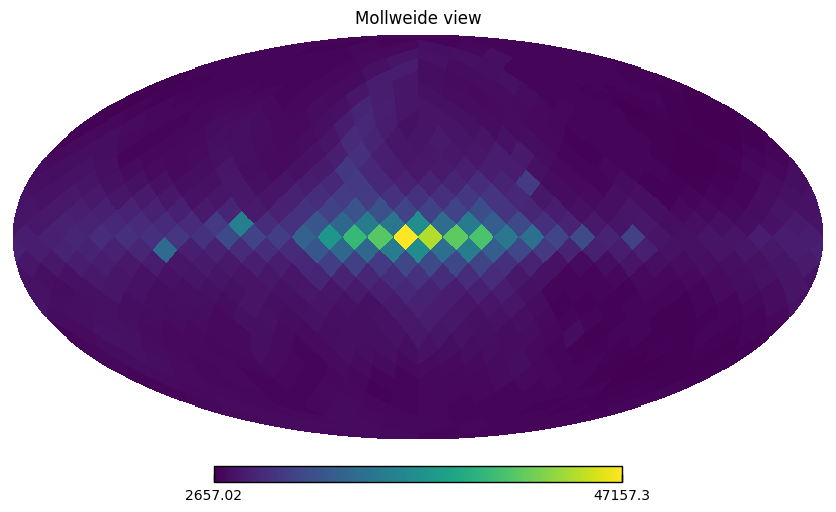

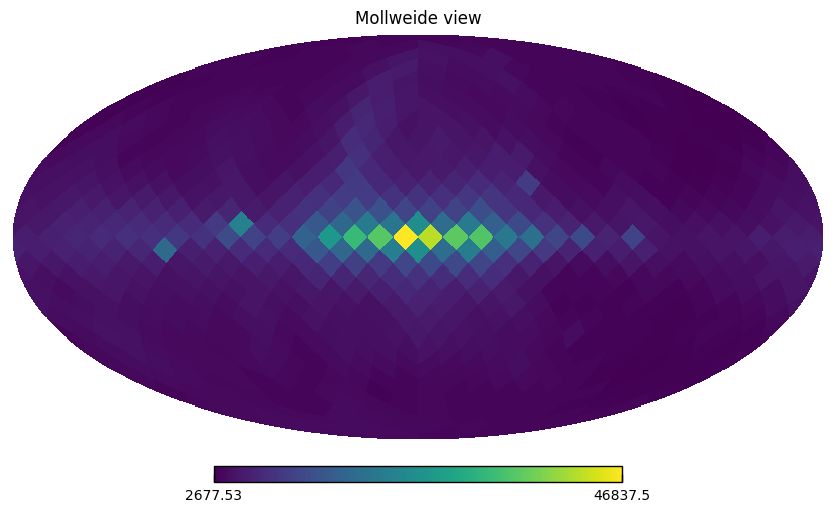

In [9]:
hp.mollview(fg_samplemean)
plt.show()
hp.mollview(fg_analmean)
plt.show()

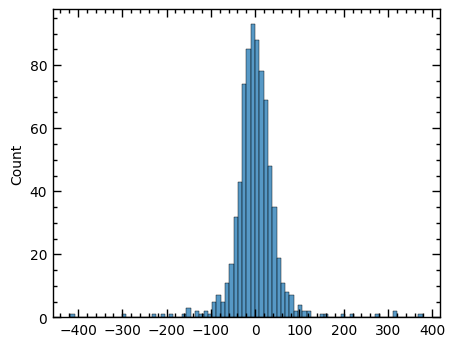

In [10]:
sns.histplot(fg_samplemean-fg_analmean)
plt.show()

<Axes: ylabel='Count'>

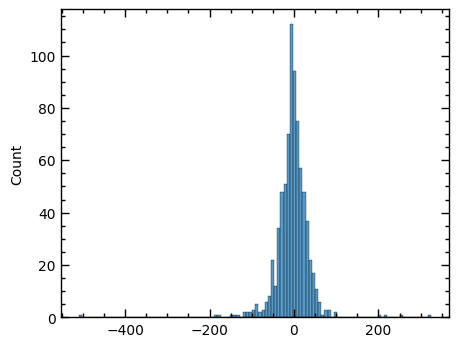

In [11]:
sns.histplot(fg_samplestd-np.sqrt(fg_analcov))

In [12]:
def get_sigma(d, mu, cov, pix='all'):
    if pix == 'all':
        return np.mean((d-mu)**2 / cov)
    return (d[pix]-mu[pix])**2 / cov[pix]


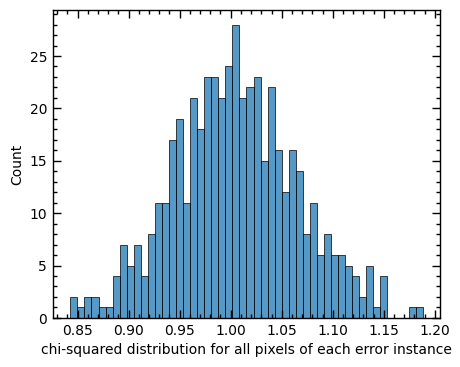

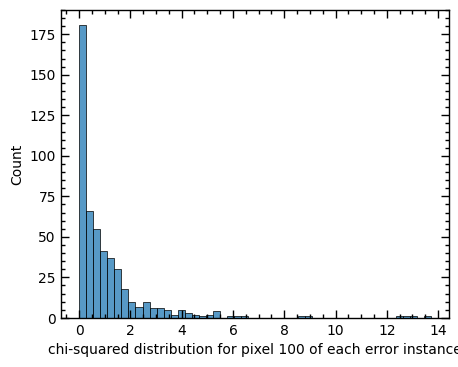

In [13]:
# Show that the distribution of sampled error instances is Gaussian?
sigmas = []
for fg_map in fg_maps:
    sigmas.append(get_sigma(fg_map, gsma_map, fg_analcov, pix='all'))
sns.histplot(sigmas, bins=50)
plt.xlabel(r"chi-squared distribution for all pixels of each error instance")
plt.show()
sigmas = []
for fg_map in fg_maps:
    sigmas.append(get_sigma(fg_map, gsma_map, fg_analcov, pix=100))
sns.histplot(sigmas, bins=50)
plt.xlabel(r"chi-squared distribution for pixel 100 of each error instance")
plt.show()

## Investigate alm covariance matrix

In [14]:
# First see the difference between using Y^-1 and not using it.
lmax = 32
nside = lmax
gsma_alm_invY, gsma_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, original_map=True)
gsma_alm_map2alm = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=False)

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561


/Users/yordani/Documents/boosted_compass/matrix-observer/src/spherical_harmonics.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  almr[idxr_p] = almc[idxc]


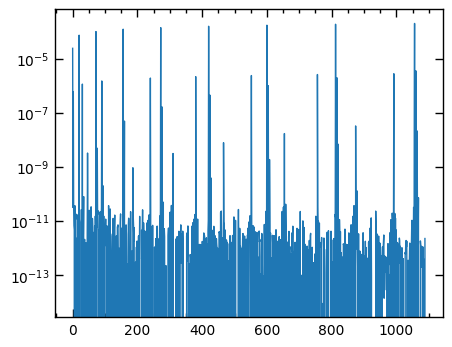

In [15]:
plt.semilogy(np.abs(gsma_alm_invY)-np.abs(gsma_alm_map2alm))

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561


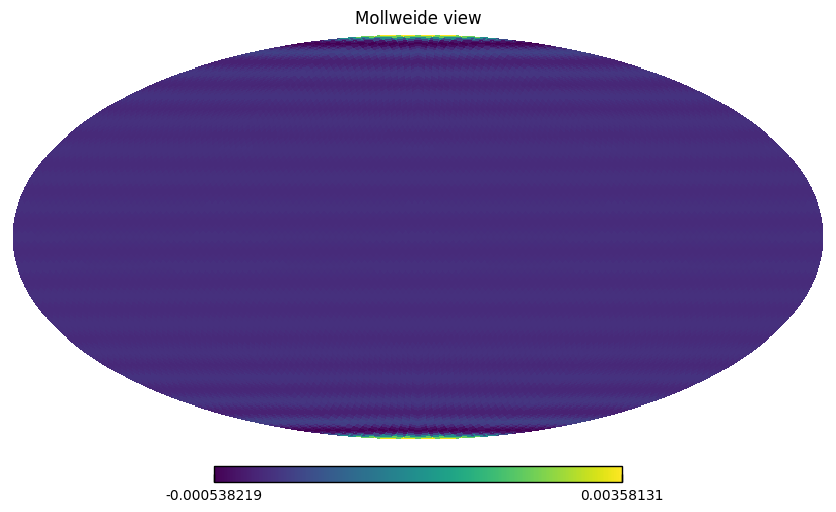

In [16]:
# Convert back to temperature space using the two methods and check discrepancies.
gsma_reconstructed_Y = SM.calc_spherical_harmonic_matrix(nside, lmax) @ gsma_alm_invY
gsma_reconstructed_alm2map = hp.alm2map(RS.real2ComplexALM(gsma_alm_map2alm), nside, lmax)
hp.mollview(gsma_reconstructed_Y-gsma_reconstructed_alm2map)

In [17]:
np.shape(fg_alms)

(500, 81)

In [18]:
np.shape(temp_covar_anal)

NameError: name 'temp_covar_anal' is not defined

In [41]:
nuarr = 60
lmax  = 8
nside = lmax
seed = 123
sigma = 0.0851
sigma_T = sigma * np.log(408/nuarr)

_, gsma_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, original_map=True)
gsma_map = gsma_map[0]
_, fg_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed, original_map=True)
# Generate a series of these
fg_maps = []
fg_alms = []
for i in range(1000):
    alm, m = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed+i, original_map=True)
    fg_maps.append(m[0])
    fg_alms.append(alm)


successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successfully loaded spherical_harmonic_matrix npix, nalm : 768 45
successful

In [51]:
# Investigate the np.cov method and the analytic method of computing the covariance matrix of the error instances.
sigma_T = sigma * np.log(408/nuarr)
alm_covar_covs = [np.cov(fg_alms[:i], rowvar=False) for i in [10, 20, 100, 200, 500, 1000]]

inv_Y = np.linalg.pinv(SH.calc_spherical_harmonic_matrix(nside, lmax)) #SH.calc_inv_spherical_harmonic_matrix(nside, lmax)
temp_covar_anal = np.diag((gsma_map-T_CMB)**2 * (np.exp(2*sigma_T**2)-np.exp(sigma_T**2)))
alm_covar_anal = inv_Y @ temp_covar_anal @ inv_Y.T

successfully loaded spherical_harmonic_matrix npix, nalm : 768 45


In [52]:
np.shape(alm_covar_covs)

(6, 81, 81)

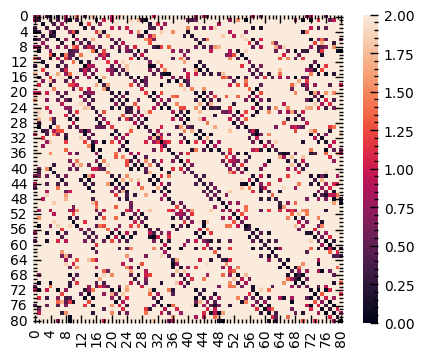

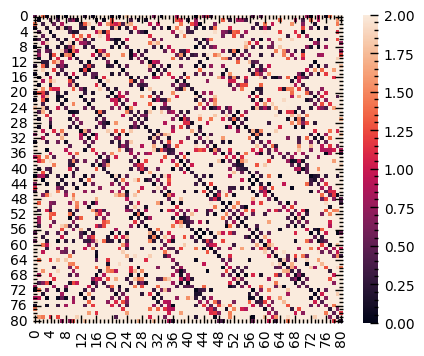

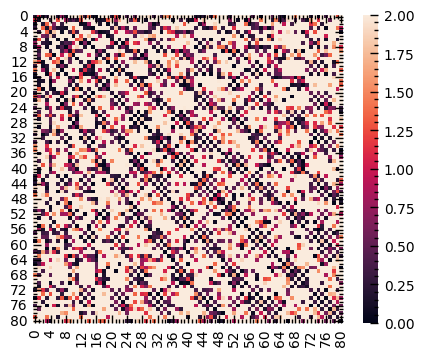

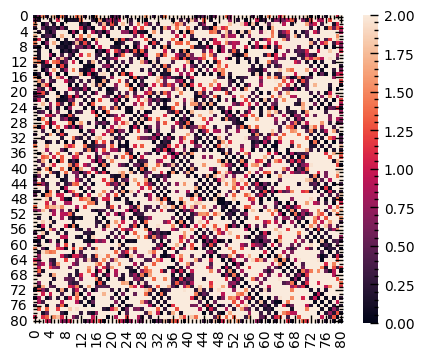

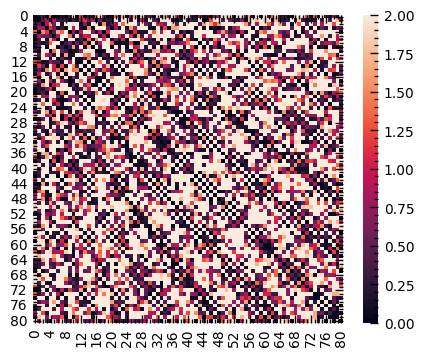

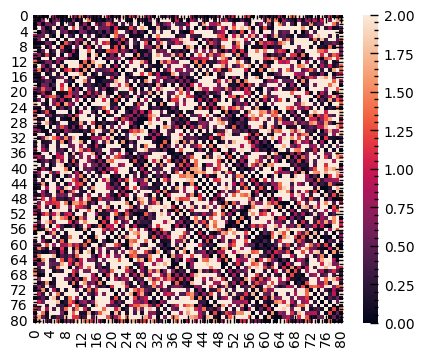

In [55]:
for alm_covar_cov in alm_covar_covs:
    sns.heatmap(abs(alm_covar_cov/alm_covar_anal-1), vmin=0, vmax=2)
    plt.show()

<Axes: >

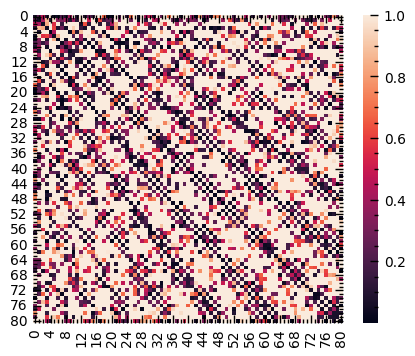

In [27]:
sns.heatmap(np.abs((alm_covar_anal-alm_covar_cov)/alm_covar_anal), vmax=1)

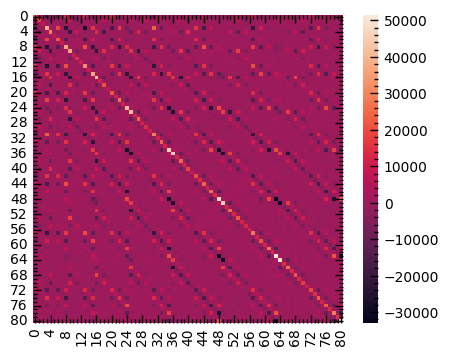

<Axes: >

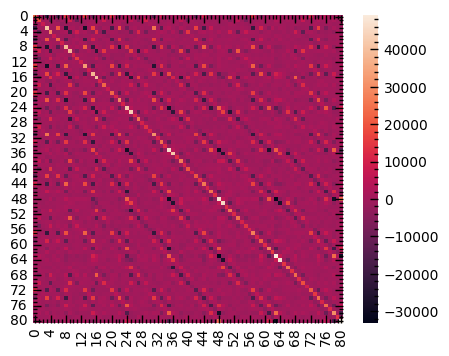

In [29]:
sns.heatmap(alm_covar_anal)
plt.show()
sns.heatmap(alm_covar_cov)


500

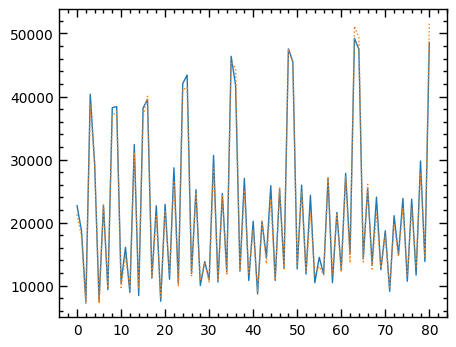

In [33]:
plt.plot(np.diag(alm_covar_cov))
plt.plot(np.diag(alm_covar_anal), linestyle=':')


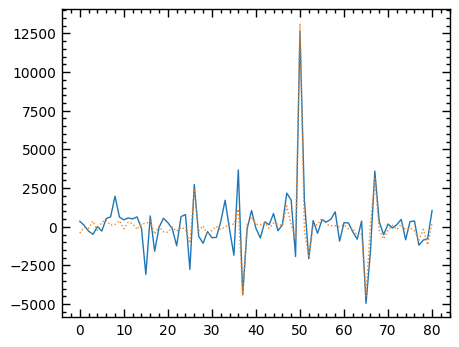

In [34]:
plt.plot(alm_covar_cov[:,50])
plt.plot(alm_covar_anal[:,50], linestyle=':')

20

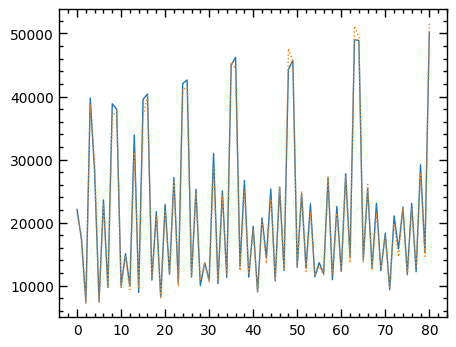

In [39]:
plt.plot(np.diag(alm_covar_cov))
plt.plot(np.diag(alm_covar_anal), linestyle=':')


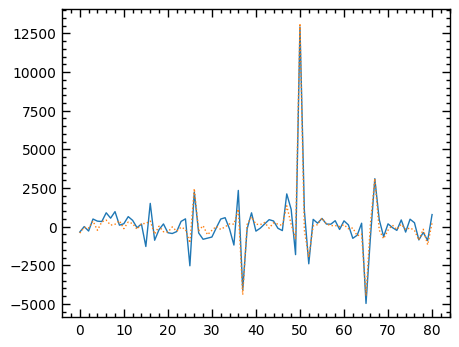

In [40]:
plt.plot(alm_covar_cov[:,50])
plt.plot(alm_covar_anal[:,50], linestyle=':')

<Axes: >

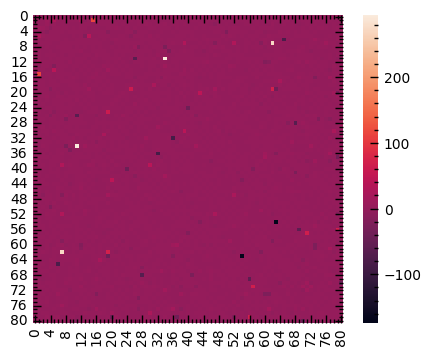

In [30]:
sns.heatmap(alm_covar_anal/alm_covar_cov)

## Generate a chi-squared $\approx$ 1 foreground with nside=lmax=32

In [20]:
# Now do this stuff with the big boi nside=lmax=32
nuarr = 60
lmax  = 32
nside = lmax
seed = 123
sigma = 0.0851
sigma_T = sigma * np.log(408/nuarr)

_, gsma_map = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, original_map=True)
gsma_map = gsma_map[0]

# Generate a series of these
fg_maps = []
for i in range(50):
    _, m = SM.foreground_gsma_alm_nsidelo(nu=nuarr, lmax=lmax, nside=nside, use_mat_Y=True, 
                               delta=sigma, seed=seed+i, original_map=True)
    fg_maps.append(m[0])

successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harmonic_matrix npix, nalm : 12288 561
successfully loaded spherical_harm

In [21]:
# Calculate the analytic mean and covariance of the error instance distribution.
fg_analmean = (gsma_map-T_CMB)*np.exp(sigma_T**2/2) + T_CMB
fg_analcov  = (gsma_map-T_CMB)**2 * (np.exp(2*sigma_T**2)-np.exp(sigma_T**2))

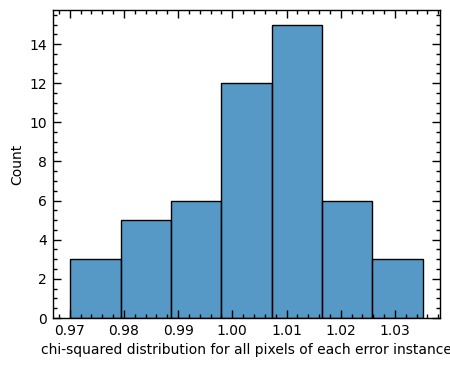

<Axes: ylabel='Count'>

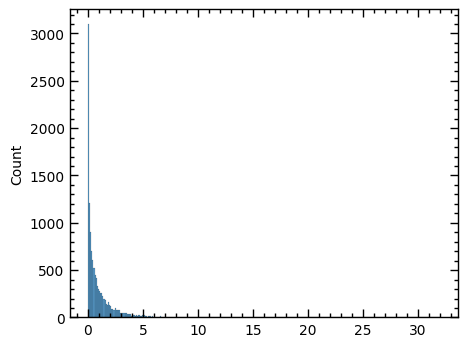

In [28]:
def get_sigma(d, mu, cov, pix='all'):
    if pix == 'all':
        return np.mean((d-mu)**2 / cov)
    if pix=='single':
        return (d-mu)**2 / cov
    return (d[pix]-mu[pix])**2 / cov[pix]

sigmas = []
for fg_map in fg_maps:
    sigmas.append(get_sigma(fg_map, gsma_map, fg_analcov, pix='all'))
sns.histplot(sigmas)
plt.xlabel(r"chi-squared distribution for all pixels of each error instance")
plt.show()

sns.histplot(get_sigma(fg_maps[0], gsma_map, fg_analcov, pix='single'))

In [26]:
# Pick the closest to 1 and save it.
sigmas

[1.0124632746649593,
 0.9821432444043684,
 0.9946765657118631,
 1.0184605270872735,
 1.0062254059430555,
 0.9867771999625949,
 1.008360609546087,
 1.0038641442323615,
 1.0126326105288486,
 1.0140909630053796,
 1.0082203802057947,
 1.0011602333965395,
 0.9928835171381195,
 0.9833824339040436,
 1.0191528230826534,
 1.0177705989130474,
 1.012580775473903,
 0.9927479896494943,
 0.999709773893034,
 1.005272753592591,
 1.035100546217661,
 1.0108929852674937,
 1.0063820648006552,
 1.004941887031461,
 1.0041551625841685,
 0.9855991205503306,
 1.024514678886494,
 1.009274862515051,
 1.003723649145443,
 1.021513658844083,
 1.0107699091078413,
 0.9889848799913091,
 1.0132198485496353,
 1.013859214259562,
 0.9824052619876583,
 1.0165050851384836,
 1.032553393518367,
 1.0059406077109527,
 0.9969365188899243,
 0.9996485632614595,
 1.0006980130123555,
 1.0078910651054844,
 1.009404261250915,
 0.979103694303479,
 1.0128924825948389,
 1.0310809292289513,
 0.9944962261823803,
 0.9701278434547005,
 1.022